Building a regression model

- Build the simple logistic regression model er 
- We will :
    - convert your categorical data to the 'category' type
    - Train the model using [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit)


In [6]:
#load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix

In [7]:
#load data into dataframe
loan_df = pd.read_csv('D:/peronal/cfi/Student_Downloads/data/vehicle_loans_feat.csv', index_col='UNIQUEID')

In [8]:
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE']
loan_df[category_cols] = loan_df[category_cols].astype('category')

In [9]:
small_cols = ['STATE_ID', 'LTV', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE', 'DISBURSAL_MONTH', 'LOAN_DEFAULT']
loan_df_sml = loan_df[small_cols]

loan_data_dumm = pd.get_dummies(loan_df_sml, prefix_sep='_', drop_first=True)

x = loan_data_dumm.drop(['LOAN_DEFAULT'], axis=1)
y = loan_data_dumm['LOAN_DEFAULT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
#Check the score for accuracy of the Model. Higher the score more accurate the model , but sometimes can be misleading
logistic_model.score(x_test, y_test)

# It tells us the variance between the dependent and independent variables

0.7822907507881023

In [18]:
#use predict to extract our model's predictions on the test data
preds = logistic_model.predict(x_test)
preds

#We have seen that predict returns an array of the predicted classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
#Now pass the preds to the confusion_matrix
conf_mat = confusion_matrix(y_test, preds)
conf_mat

array([[36476,     1],
       [10151,     3]], dtype=int64)

In [13]:
# Now extract the values from the confusion matrix for analysis
tn = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tp = conf_mat[1][1]

In [14]:
#print the output
print("True Negatives (Correct Non-Defaults): ", tn)
print("False Positives (Incorrect Defaults): ", fp)
print("False Negatives (Incorrect Non-Defaults): ", fn)
print("True Positives (Correct Defaults)", tp)

True Negatives (Correct Non-Defaults):  36476
False Positives (Incorrect Defaults):  1
False Negatives (Incorrect Non-Defaults):  10151
True Positives (Correct Defaults) 3


C:\Users\rajat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


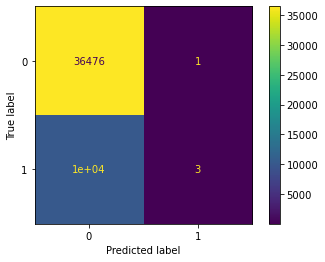

In [15]:
#Now create a confusion Marix for further analysis
plot_confusion_matrix(logistic_model, x_test, y_test)
plt.show()

In [19]:
# check precision_score
precision = precision_score(y_test, preds)
precision

0.75

In [20]:
#check recall_score
recall = recall_score(y_test, preds)
recall

0.00029545006893834944

In [21]:
#used f1_score
f1 = f1_score(y_test, preds)
f1

0.0005906674542232723

In [22]:
#used predict_proba
probs = logistic_model.predict_proba(x_test)
probs

array([[0.71531129, 0.28468871],
       [0.82073317, 0.17926683],
       [0.79464352, 0.20535648],
       ...,
       [0.77461636, 0.22538364],
       [0.90236475, 0.09763525],
       [0.74212478, 0.25787522]])

In [23]:
probs.shape

(46631, 2)

In [24]:
print(probs[:, 0])
print(probs[:, 1])

[0.71531129 0.82073317 0.79464352 ... 0.77461636 0.90236475 0.74212478]
[0.28468871 0.17926683 0.20535648 ... 0.22538364 0.09763525 0.25787522]


We can also create a dataframe and get the summary statistics for our predicted probabilities 

In [25]:
#dataframe created
probs_df = pd.DataFrame()
probs_df['prob_0'] = probs[:, 0]
probs_df['prob_1'] = probs[:, 1]

probs_df.describe()

,prob_0,prob_1
count,46631.000000,46631.000000
mean,0.783692,0.216308
std,0.067736,0.067736
min,0.480136,0.035136
25%,0.740012,0.169167
50%,0.787235,0.212765
75%,0.830833,0.259988
max,0.964864,0.519864


In [26]:
#passed three parameters to roc_curve
fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)

In [27]:
print("FPR: ", fpr)
print("TPR: ", tpr)
print("Threshold: ", threshold)

FPR:  [0.00000000e+00 2.74145352e-05 2.74145352e-05 ... 9.99725855e-01
 9.99725855e-01 1.00000000e+00]
TPR:  [0.00000000e+00 9.84833563e-05 2.95450069e-04 ... 9.99901517e-01
 1.00000000e+00 1.00000000e+00]
Threshold:  [1.51986387 0.51986387 0.50719418 ... 0.04980574 0.04973661 0.03513621]


In [28]:
#created a dataframe
roc_df = pd.DataFrame()
roc_df['fpr'] = fpr
roc_df['tpr'] = tpr
roc_df['threshold'] = threshold

roc_df.describe()

,fpr,tpr,threshold
count,16508.000000,16508.000000,16508.000000
mean,0.412160,0.523519,0.231212
std,0.274514,0.286786,0.067175
min,0.000000,0.000000,0.035136
25%,0.175755,0.276517,0.186228
50%,0.379719,0.534518,0.227840
75%,0.626443,0.771913,0.271622
max,1.000000,1.000000,1.519864


In [29]:
# used sklearn auc function
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)

AUC:  0.6095855761941054


In [30]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

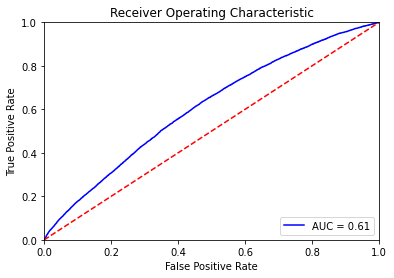

In [31]:
plot_roc_curve(fpr, tpr, roc_auc)

In [32]:
results_df = pd.DataFrame()
results_df['true_class'] = y_test
results_df['predicted_class'] = list(preds)
results_df['default_prob'] = probs[:, 1]

### Class Prediction Percentages 


In [33]:
# used df.groupby and value_counts
results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True)

true_class  predicted_class
0           0                  0.999973
            1                  0.000027
1           0                  0.999705
            1                  0.000295
Name: predicted_class, dtype: float64

In [34]:
# used results_df to plot the class probaility distribution 
default_probs_f = results_df[results_df['true_class'] == 0]['default_prob']



- Use pandas filtering to create a variable default_probs_t which contains the predicted default probability for all true defaulted loans 

In [35]:
default_probs_t = results_df[results_df['true_class'] == 1]['default_prob']

C:\Users\rajat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rajat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


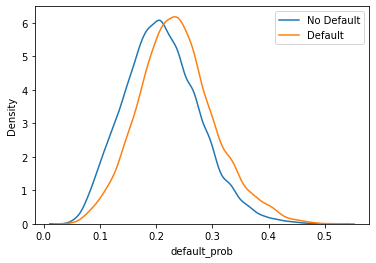

In [38]:
sns.distplot(default_probs_f, label="No Default", hist=False)
sns.distplot(default_probs_t, label="Default", hist=False)
plt.legend(loc = 'best')
plt.show()

In [40]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve 
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes 
    sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
    sns.distplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", hist=False)
    plt.show()
    
    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

C:\Users\rajat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


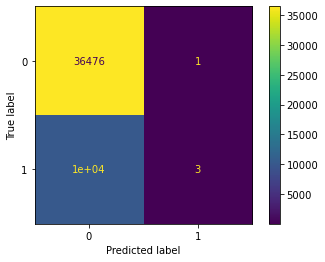



Accuracy:  0.7822907507881023
Precision:  0.75
Recall:  0.00029545006893834944
F1:  0.0005906674542232723
AUC:  0.6095855761941054


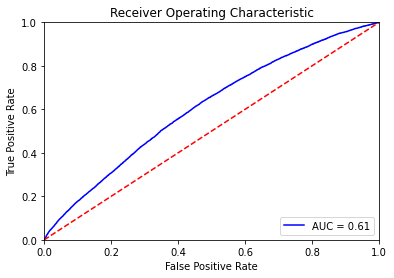

C:\Users\rajat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rajat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


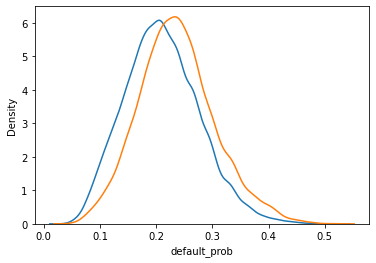

true_class  predicted_class
0           0                  0.999973
            1                  0.000027
1           0                  0.999705
            1                  0.000295
Name: predicted_class, dtype: float64


In [41]:
eval_model(logistic_model, x_test, y_test)